<a href="https://colab.research.google.com/github/salimaliraja/salimaliraja/blob/main/Copy_of_SalimAliraja_HeartDiseaseMiniProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries

# To Handle Data
import numpy as np
import pandas as pd

# To Visualize Data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To Preprocess Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler,LabelEncoder
from sklearn.impute import SimpleImputer,KNNImputer

# Import Iterative Imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Model Selection Tasks
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score

# For Classification Tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
# Evaluation Metrics
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,mean_squared_error,mean_absolute_error,r2_score

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the Data
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_disease_uci.csv')
# Display first 5 rows of the dataframe
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [ ]:
# Exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
# Get the Shape of dataframe
df.shape

(920, 16)

In [ ]:
# Get the min and max values of the id column
df['id'].min() , df['id'].max()

(1, 920)

In [ ]:
# Get the min and max values of the age column
df['age'].min() , df['age'].max()

(28, 77)

<Axes: xlabel='age', ylabel='Count'>

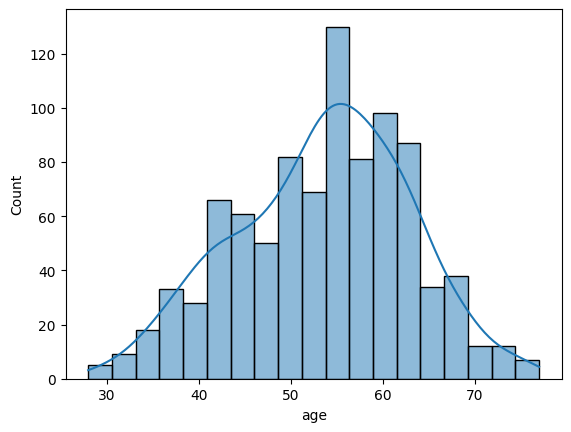

In [ ]:
# Draw a histogram of the age column to see the distribution
sns.histplot(df, x='age', kde=True)

Mean: 53.51086956521739
Median: 54.0
Mode: 54


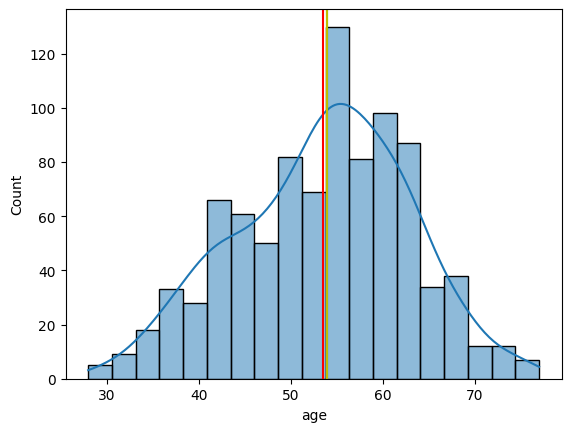

In [ ]:
# Plot the mean , median and mode of the age column using seaborn
sns.histplot(df, x='age', kde=True)
plt.axvline(df['age'].mean(), color='r')
plt.axvline(df['age'].median(), color='g')
plt.axvline(df['age'].mode()[0], color='y')

# Print the mean, median and mode
print(f"Mean: {df['age'].mean()}")
print(f"Median: {df['age'].median()}")
print(f"Mode: {df['age'].mode()[0]}")

In [ ]:
# Plot the histogram of age column using plotly  coloring this by sex column
px.histogram(df, x='age', color='sex')

In [ ]:
# find the value count of age column by grouping sex column
age_count = df.groupby('sex')['age'].count()
print(age_count)

# visualize using plotly
fig = px.bar(age_count,color=age_count.index, title='Distribution of Male and Female in the data')
fig.show()

sex
Female    194
Male      726
Name: age, dtype: int64


In [ ]:
# Calculate % of value counts of male and female in data
male_count = 726
female_count = 194
total_count = male_count + female_count

male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

print(f"Male Percentage in the data: {male_percentage:.2f}%")
print(f"Female Percentage in the data: {female_percentage:.2f}%")

# difference
difference_percentage = (male_count - female_count) / female_count * 100
print(f"Males are {difference_percentage:.2f}% more than females in the data")

# visualize using plotly
fig = px.bar(age_count,color=age_count.index, title='Distribution of Male and Female in the data')
fig.show()

Male Percentage in the data: 78.91%
Female Percentage in the data: 21.09%
Males are 274.23% more than females in the data


In [ ]:
# let's explore the dataset column
# find the unique values in dataset column
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [ ]:
# find the unique value count of dataset column in the data

dataset_count = df['dataset'].value_counts()
print(dataset_count)

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64


In [ ]:
# visualize using plotly
plt.show()

# find the value count of dataset column grouped by sex column
df_grouped = df.groupby('sex')['dataset'].value_counts()
print(df_grouped)

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


In [ ]:
# make a plot of age column using plotly and color it by dataset column
fig = px.histogram(df, x='age', color='dataset',title='Distribution of age country-wise in the data')
fig.show()

In [ ]:
# make a dataframe of the mean, median and mode of the age column grouped by dataset column in the data
mean_age = df.groupby('dataset')['age'].mean()
median_age = df.groupby('dataset')['age'].median()
mode_age = df.groupby('dataset')['age'].agg(pd.Series.mode)

result = pd.DataFrame({
    'Mean Age': mean_age.round(1),
    'Median Age': median_age.round(0),
    'Mode Age': mode_age
}).reset_index()

result.columns = ['Dataset', 'Mean Age', 'Median Age', 'Mode Age']
result

,Dataset,Mean Age,Median Age,Mode Age
0,Cleveland,54.4,56.0,58
1,Hungary,47.9,49.0,54
2,Switzerland,55.3,56.0,61
3,VA Long Beach,59.4,60.0,"[62, 63]"


In [ ]:
# value count of the cp column in the data
df['cp'].value_counts()

,count
cp,
asymptomatic,496
non-anginal,204
atypical angina,174
typical angina,46


In [ ]:
# value count of cp column grouped by sex column in the data
df.groupby('sex')['cp'].value_counts()

sex     cp             
Female  asymptomatic        70
        atypical angina     61
        non-anginal         53
        typical angina      10
Male    asymptomatic       426
        non-anginal        151
        atypical angina    113
        typical angina      36
Name: count, dtype: int64

In [ ]:
# count plot of cp column by sex column using plotly
fig = px.histogram(df, x='cp', color='sex',title='Distribution of chest pain by age in the data')
fig.show()

In [ ]:
# value count of cp column by dataset column in the data
df.groupby('dataset')['cp'].value_counts()

dataset        cp             
Cleveland      asymptomatic       144
               non-anginal         86
               atypical angina     51
               typical angina      23
Hungary        asymptomatic       123
               atypical angina    105
               non-anginal         54
               typical angina      11
Switzerland    asymptomatic        98
               non-anginal         17
               atypical angina      4
               typical angina       4
VA Long Beach  asymptomatic       131
               non-anginal         47
               atypical angina     14
               typical angina       8
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

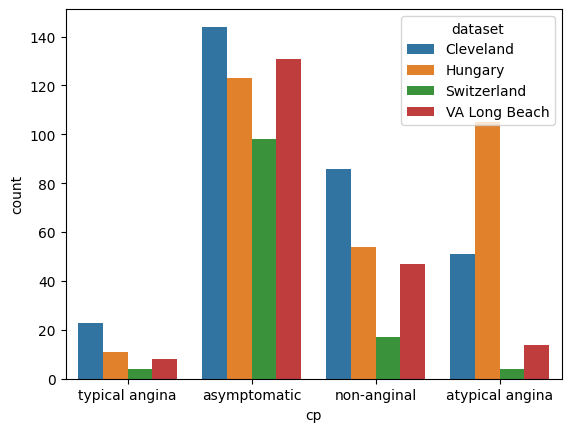

In [ ]:
# draw the plot of cp column by dataset column using seaborn
sns.countplot(df, x='cp', hue='dataset')

In [ ]:
# draw the plot of cp column by dataset column using plotly
fig = px.bar(df,x='cp', color='dataset', barmode='group',title='Distribution of chest pain country-wise in the data')
fig.show()

In [ ]:
# value count of age column grouped by cp column in the data
df.groupby('cp')['age'].value_counts()

cp              age
asymptomatic    57     27
                58     23
                54     22
                59     22
                60     22
                       ..
typical angina  60      1
                63      1
                66      1
                68      1
                74      1
Name: count, Length: 156, dtype: int64

In [ ]:
# draw the plot of age column grouped by cp column using plotly
fig = px.histogram(df, x='age', color='cp',title='Distribution of age by chest pain in the data')
fig.show()

In [ ]:
#  summary of trestbps column in the data
df['trestbps'].describe().T

,trestbps
count,861.000000
mean,132.132404
std,19.066070
min,0.000000
25%,120.000000
50%,130.000000
75%,140.000000
max,200.000000


In [ ]:
# check the value count of the trestbps column in the data
print(df['trestbps'].value_counts())


# make histplot of the trestbps column using plotly
fig = px.histogram(df, x='trestbps',title="Distribution of Resting Blood Pressure (trestbps)")
fig.show()

trestbps
120.0    131
130.0    115
140.0    102
110.0     59
150.0     56
        ... 
92.0       1
185.0      1
0.0        1
96.0       1
127.0      1
Name: count, Length: 61, dtype: int64


In [ ]:
# Define bin edges (upper limits of categories)
bins = [0, 90, 120, 129, 139, 159, 180, float('inf')]

# Define bin labels
labels = [
    'Invalid or Hypotension',   # 0–90
    'Normal',                   # 91–120
    'Elevated',                 # 121–129
    'Hypertension Stage 1',     # 130–139
    'Hypertension Stage 2',     # 140–159
    'Severe Hypertension',      # 160–180
    'Hypertensive Crisis'       # >180
]

# Bin the data
df['trestbps_category'] = pd.cut(df['trestbps'], bins=bins, labels=labels, right=True, include_lowest=True)

# Optional: Check distribution
print(df['trestbps_category'].value_counts())

# visualize the distribution using plotly
fig = px.bar(df, y='trestbps_category',title="Feature Engineering : Resting Blood Pressure (trestbps) Categories ")
fig.update_yaxes(autorange='reversed')
fig.show()

trestbps_category
Normal                    291
Hypertension Stage 2      218
Hypertension Stage 1      177
Severe Hypertension        85
Elevated                   80
Hypertensive Crisis         8
Invalid or Hypotension      2
Name: count, dtype: int64


In [ ]:
# Basic statistics for cholesterol column
print("\nBasic Statistics for Cholesterol:")
print(df['chol'].describe())


Basic Statistics for Cholesterol:
count    890.000000
mean     199.130337
std      110.780810
min        0.000000
25%      175.000000
50%      223.000000
75%      268.000000
max      603.000000
Name: chol, dtype: float64


In [ ]:
# Additional statistics
print("\nAdditional Statistics:")
print(f"Median cholesterol: {df['chol'].median()}")
print(f"Mode cholesterol: {df['chol'].mode()[0]}")


Additional Statistics:
Median cholesterol: 223.0
Mode cholesterol: 0.0


In [ ]:
# Check for missing values
print("\nMissing Values Check:")
print(f"Number of missing values in cholestrol column: {df['chol'].isna().sum()}")


Missing Values Check:
Number of missing values in cholestrol column: 30


In [ ]:
# Check for zeros values of cholestrol
print("\nZero/Negative Values Check:")
print(f"Number of zero values: {(df['chol'] == 0).sum()}")


Zero/Negative Values Check:
Number of zero values: 172


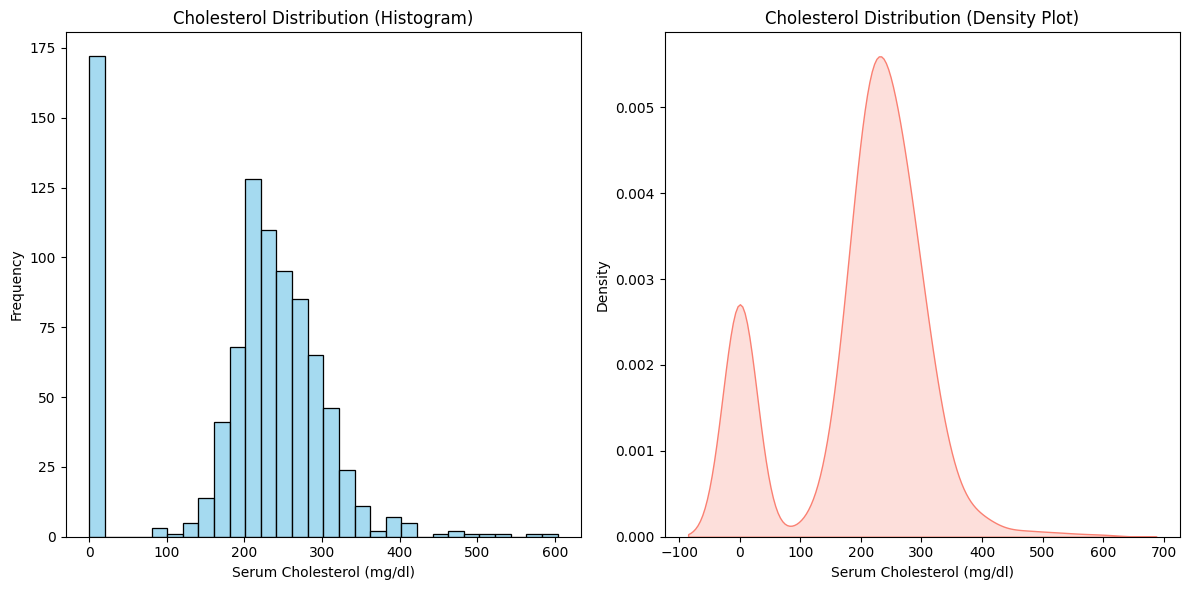

In [ ]:
plt.figure(figsize=(12, 6))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['chol'], bins=30, kde=False, color='skyblue')
plt.title('Cholesterol Distribution (Histogram)')
plt.xlabel('Serum Cholesterol (mg/dl)')
plt.ylabel('Frequency')

# Density plot
plt.subplot(1, 2, 2)
sns.kdeplot(df['chol'], fill=True, color='salmon')
plt.title('Cholesterol Distribution (Density Plot)')
plt.xlabel('Serum Cholesterol (mg/dl)')

plt.tight_layout()
plt.show()

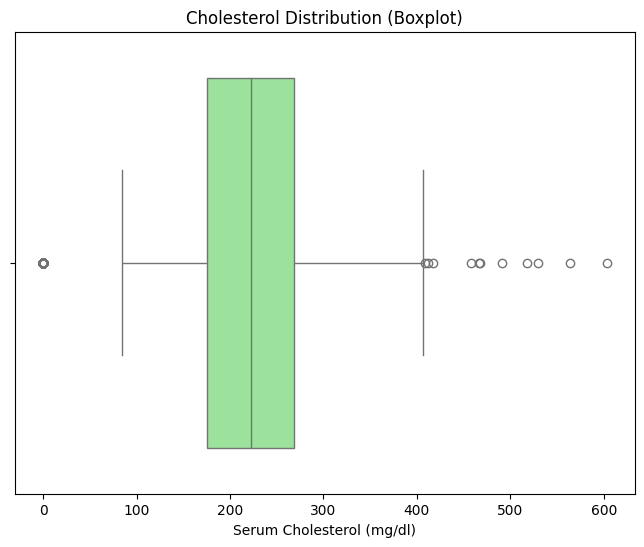

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['chol'], color='lightgreen')
plt.title('Cholesterol Distribution (Boxplot)')
plt.xlabel('Serum Cholesterol (mg/dl)')
plt.show()

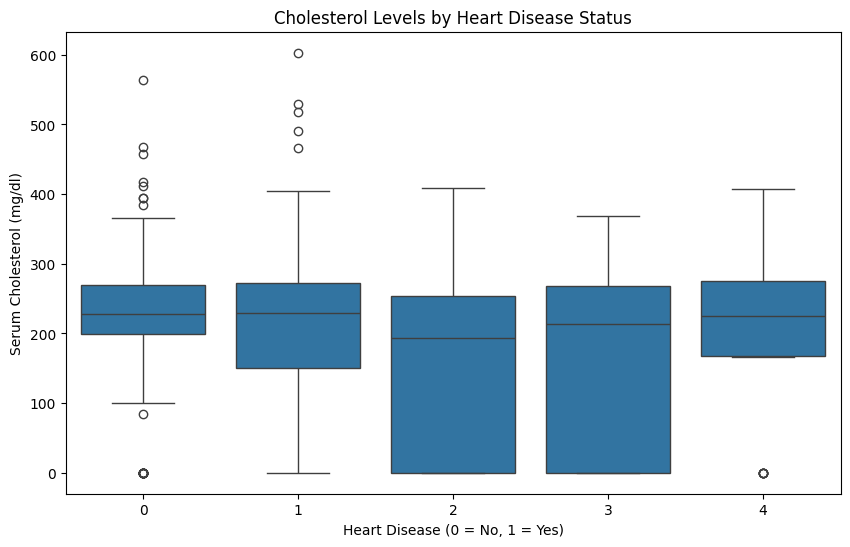

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='num', y='chol', data=df)
plt.title('Cholesterol Levels by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Serum Cholesterol (mg/dl)')
plt.show()

In [ ]:
# Value counts and proportions
fbs_counts = df['fbs'].value_counts()
fbs_perc = df['fbs'].value_counts(normalize=True) * 100
print(f"Fasting Blood Sugar Value Counts:\n{fbs_counts}")
print(f"Fasting Blood Sugar Proportions: {fbs_perc.round(2)}")

Fasting Blood Sugar Value Counts:
fbs
False    692
True     138
Name: count, dtype: int64
Fasting Blood Sugar Proportions: fbs
False    83.37
True     16.63
Name: proportion, dtype: float64


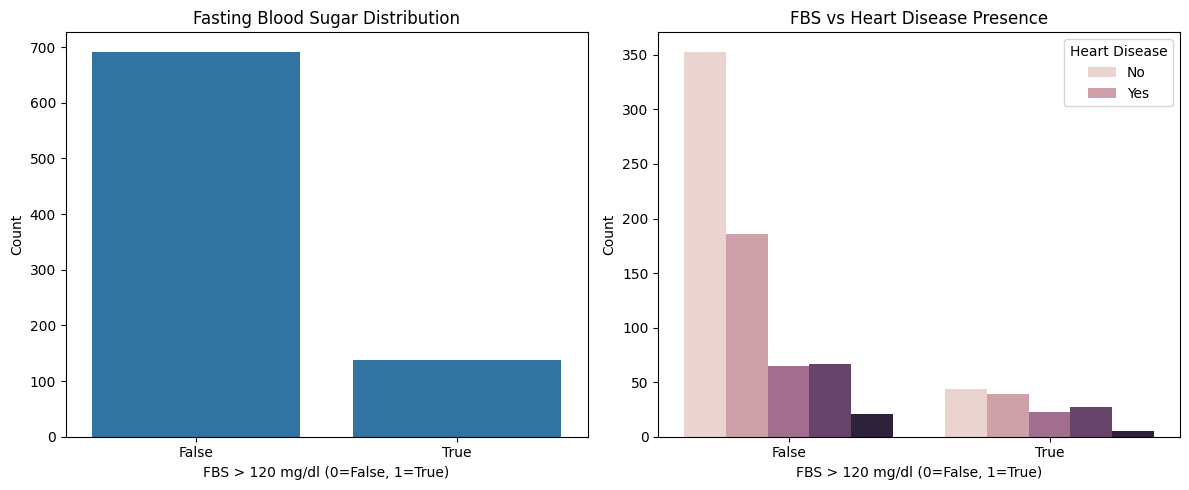

In [ ]:
plt.figure(figsize=(12, 5))

# Countplot
plt.subplot(1, 2, 1)
sns.countplot(x='fbs', data=df)
plt.title('Fasting Blood Sugar Distribution')
plt.xlabel('FBS > 120 mg/dl (0=False, 1=True)')
plt.ylabel('Count')

# Heart disease relationship
plt.subplot(1, 2, 2)
sns.countplot(x='fbs', hue='num', data=df)
plt.title('FBS vs Heart Disease Presence')
plt.xlabel('FBS > 120 mg/dl (0=False, 1=True)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

In [ ]:
#electrocardiogram results
df['restecg'].value_counts()

,count
restecg,
normal,551
lv hypertrophy,188
st-t abnormality,179


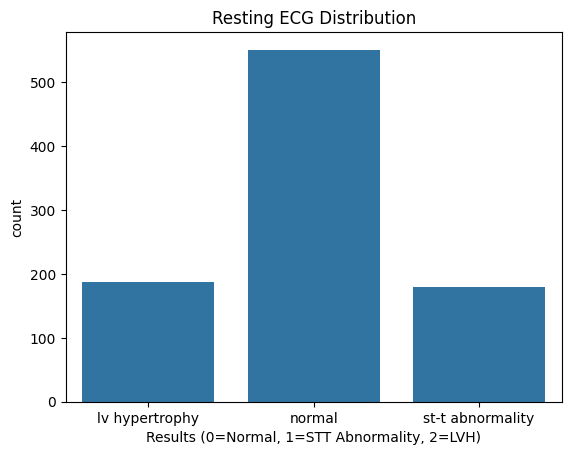

In [ ]:
sns.countplot(x='restecg', data=df)
plt.title('Resting ECG Distribution')
plt.xlabel('Results (0=Normal, 1=STT Abnormality, 2=LVH)')
plt.show()

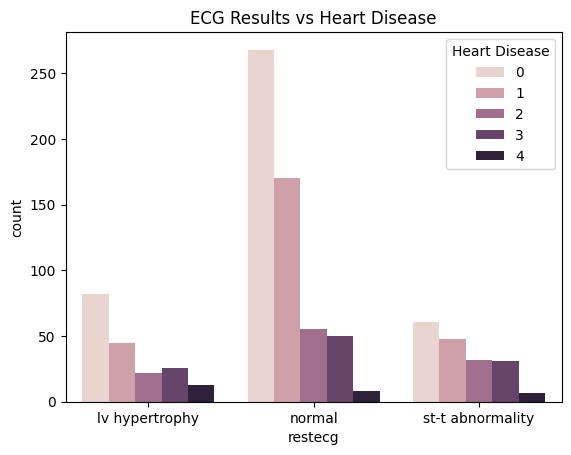

In [ ]:
sns.countplot(x='restecg', hue='num', data=df)
plt.title('ECG Results vs Heart Disease')
plt.legend(title='Heart Disease')
plt.show()

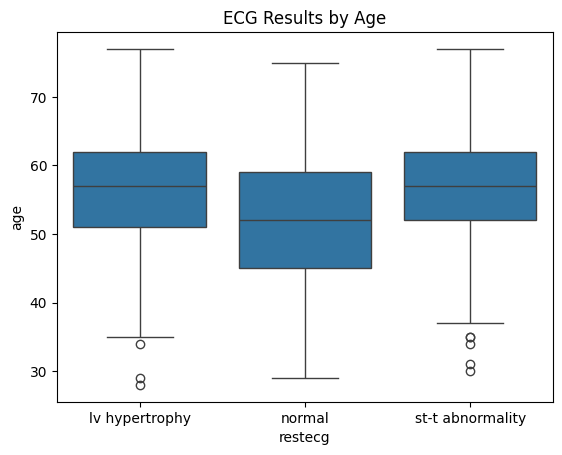

In [ ]:
sns.boxplot(x='restecg', y='age', data=df)
plt.title('ECG Results by Age')
plt.show()

In [ ]:
#maximum heart rate achieved
df['thalch'].describe()

,thalch
count,865.000000
mean,137.545665
std,25.926276
min,60.000000
25%,120.000000
50%,140.000000
75%,157.000000
max,202.000000


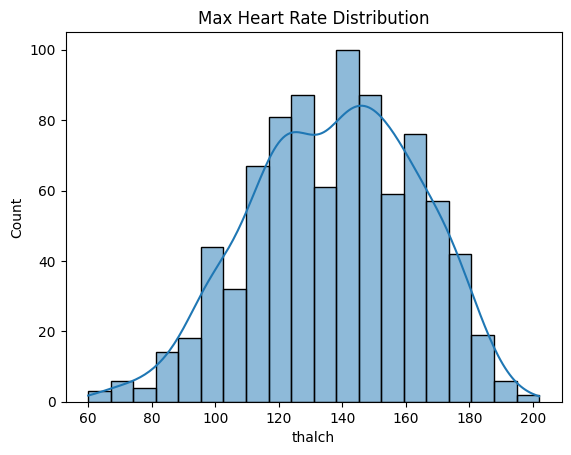

In [ ]:
sns.histplot(df['thalch'], bins=20, kde=True)
plt.title('Max Heart Rate Distribution')
plt.show()

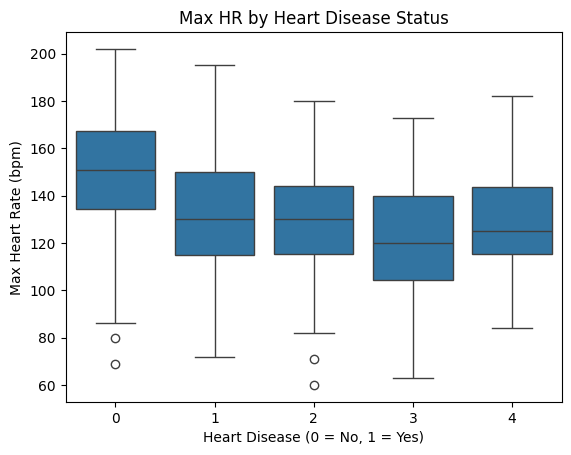

In [ ]:
sns.boxplot(x='num', y='thalch', data=df)
plt.title('Max HR by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Max Heart Rate (bpm)')
plt.show()

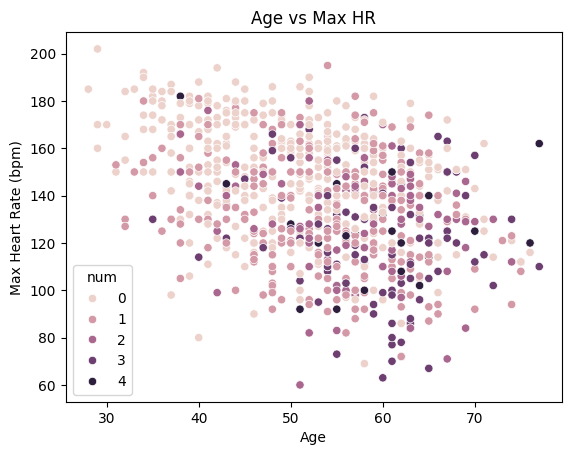

In [ ]:
sns.scatterplot(x='age', y='thalch', hue='num', data=df)
plt.title('Age vs Max HR')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate (bpm)')
plt.show()

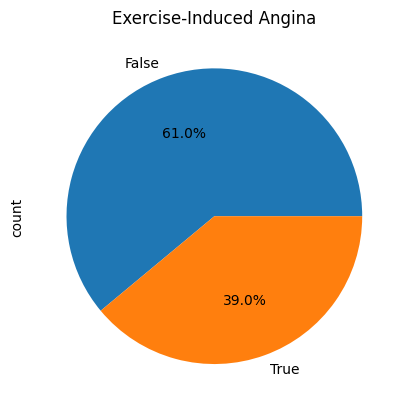

In [ ]:
#exercise-induced angina incidence
df['exang'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Exercise-Induced Angina')
plt.show()

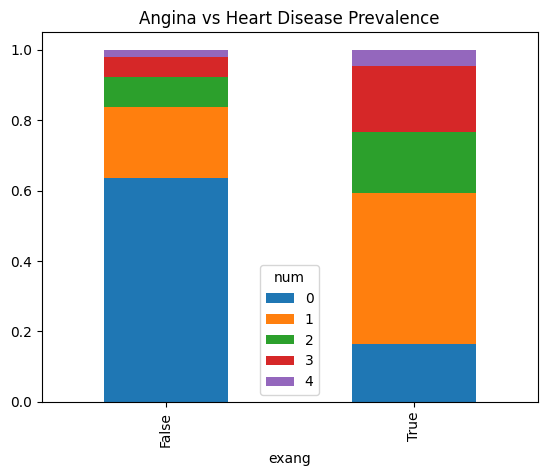

In [ ]:
pd.crosstab(df['exang'], df['num'], normalize='index').plot.bar(stacked=True)
plt.title('Angina vs Heart Disease Prevalence')
plt.show()

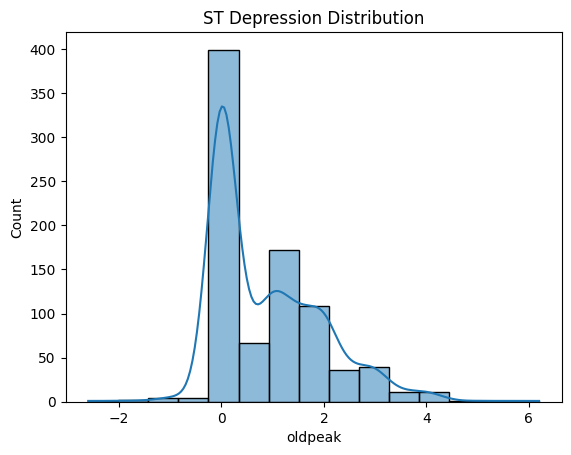

In [ ]:
#ST depression
sns.histplot(df['oldpeak'], bins=15, kde=True)
plt.title('ST Depression Distribution')
plt.show()

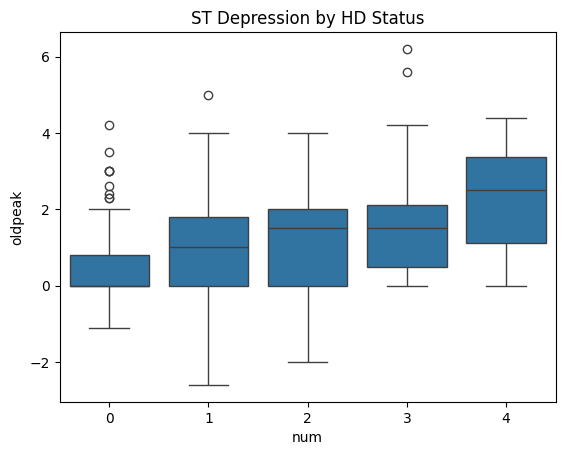

In [ ]:
sns.boxplot(x='num', y='oldpeak', data=df)
plt.title('ST Depression by HD Status')
plt.show()

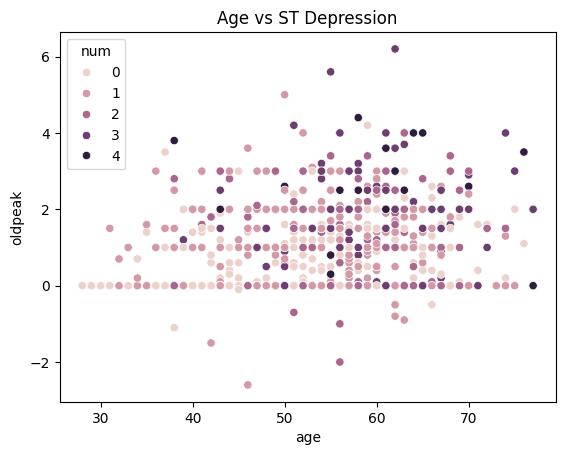

In [ ]:
sns.scatterplot(x='age', y='oldpeak', hue='num', data=df)
plt.title('Age vs ST Depression')
plt.show()

In [ ]:
#Data PREprocessing
#missing values
# find the missing values percentage of trestbps column in the data
print(f"Percentage of missing values in the trestbps column: {df['trestbps'].isnull().sum() / len(df) * 100:.2f}%")

Percentage of missing values in the trestbps column: 6.41%


In [ ]:
# check missing values in the all columns of the data
missing = (df.isnull().sum()[df.isnull().sum()>0]/len(df)*100).sort_values(ascending=False)
print(missing)


# create the bar plot using plotly
fig = px.bar(missing,title="Percentage of Missing values in the data")
fig.show()

ca                   66.413043
thal                 52.826087
slope                33.586957
fbs                   9.782609
oldpeak               6.739130
trestbps_category     6.413043
trestbps              6.413043
exang                 5.978261
thalch                5.978261
chol                  3.260870
restecg               0.217391
dtype: float64


In [ ]:
#Machine Learning Based Imputation
# Create a list of columns with missing values greater than 0
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'trestbps_category']

In [ ]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [ ]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()] # find rows with missing values
    df_not_null = df[df[passed_col].notnull()] # find rows without missing values

    # drop the column with missing values
    X = df_not_null.drop(passed_col, axis=1)

    # store the column with missing values in y
    y = df_not_null[passed_col]

    # find other columns with missing values in the dataframe
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    # create a LabelEncoder object to encode the categorical columns
    label_encoder = LabelEncoder()

    # encode the categorical columns by looping through the columns in X
    for col in X.columns:
        # if the dtype of the column is object or category
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            # encode the column using the label encoder
            X[col] = label_encoder.fit_transform(X[col])

    # If the column passed is in the bool_cols list
    if passed_col in bool_cols:
        # encode the column using the label encoder
        y = label_encoder.fit_transform(y)
    # Create iterative imputer with Random Forest Regressor as the estimator
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    # loop through the columns in other_missing_cols
    for col in other_missing_cols:
        # if the column has missing values
        if X[col].isnull().sum() > 0:
            # reshape the column to a 2D array
            col_with_missing_values = X[col].values.reshape(-1, 1)
            # impute the missing values using the iterative imputer
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            # replace the missing values in the column with the imputed values
            X[col] = imputed_values[:, 0]
        else:
            # do nothing
            pass
    # split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # create a random forest classifier
    rf_classifier = RandomForestClassifier()

    # fit the classifier to the training data
    rf_classifier.fit(X_train, y_train)

    # make predictions on the testing data
    y_pred = rf_classifier.predict(X_test)

    # calculate the accuracy score
    acc_score = accuracy_score(y_test, y_pred)

    # print the accuracy score
    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):

    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]

    other_missing_cols = [col for col in missing_data_cols if col != passed_col]

    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass

    if len(df_null) > 0:
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])

    return df_combined[passed_col]

In [ ]:
# check for greater than zero missing values in the data
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

,0
ca,611
thal,486
slope,309
fbs,90
oldpeak,62
trestbps_category,59
trestbps,59
exang,55
thalch,55
chol,30


In [ ]:
# impute missing values using  functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%
MAE = 4.244682080924855 

RMSE = 29.321382080924852 

R2 = 0.9084491808766832 

Missing Values chol : 3.26%
MAE = 44.49814606741573 

RMSE = 3957.137760112359 

R2 = 0.6865272346190194 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 79.52 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 68.48 accuracy

Missing Values thalch : 5.98%
MAE = 16.684335260115606 

RMSE = 469.42426069364166 

R2 = 0.3174179796058112 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 79.19 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5636802325581396 

RMSE = 0.6183265058139535 

R2 = 0.41091792274223127 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 65.85 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 69.35 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 71.26 accuracy

Missing Values trestbps_category : 6.41%

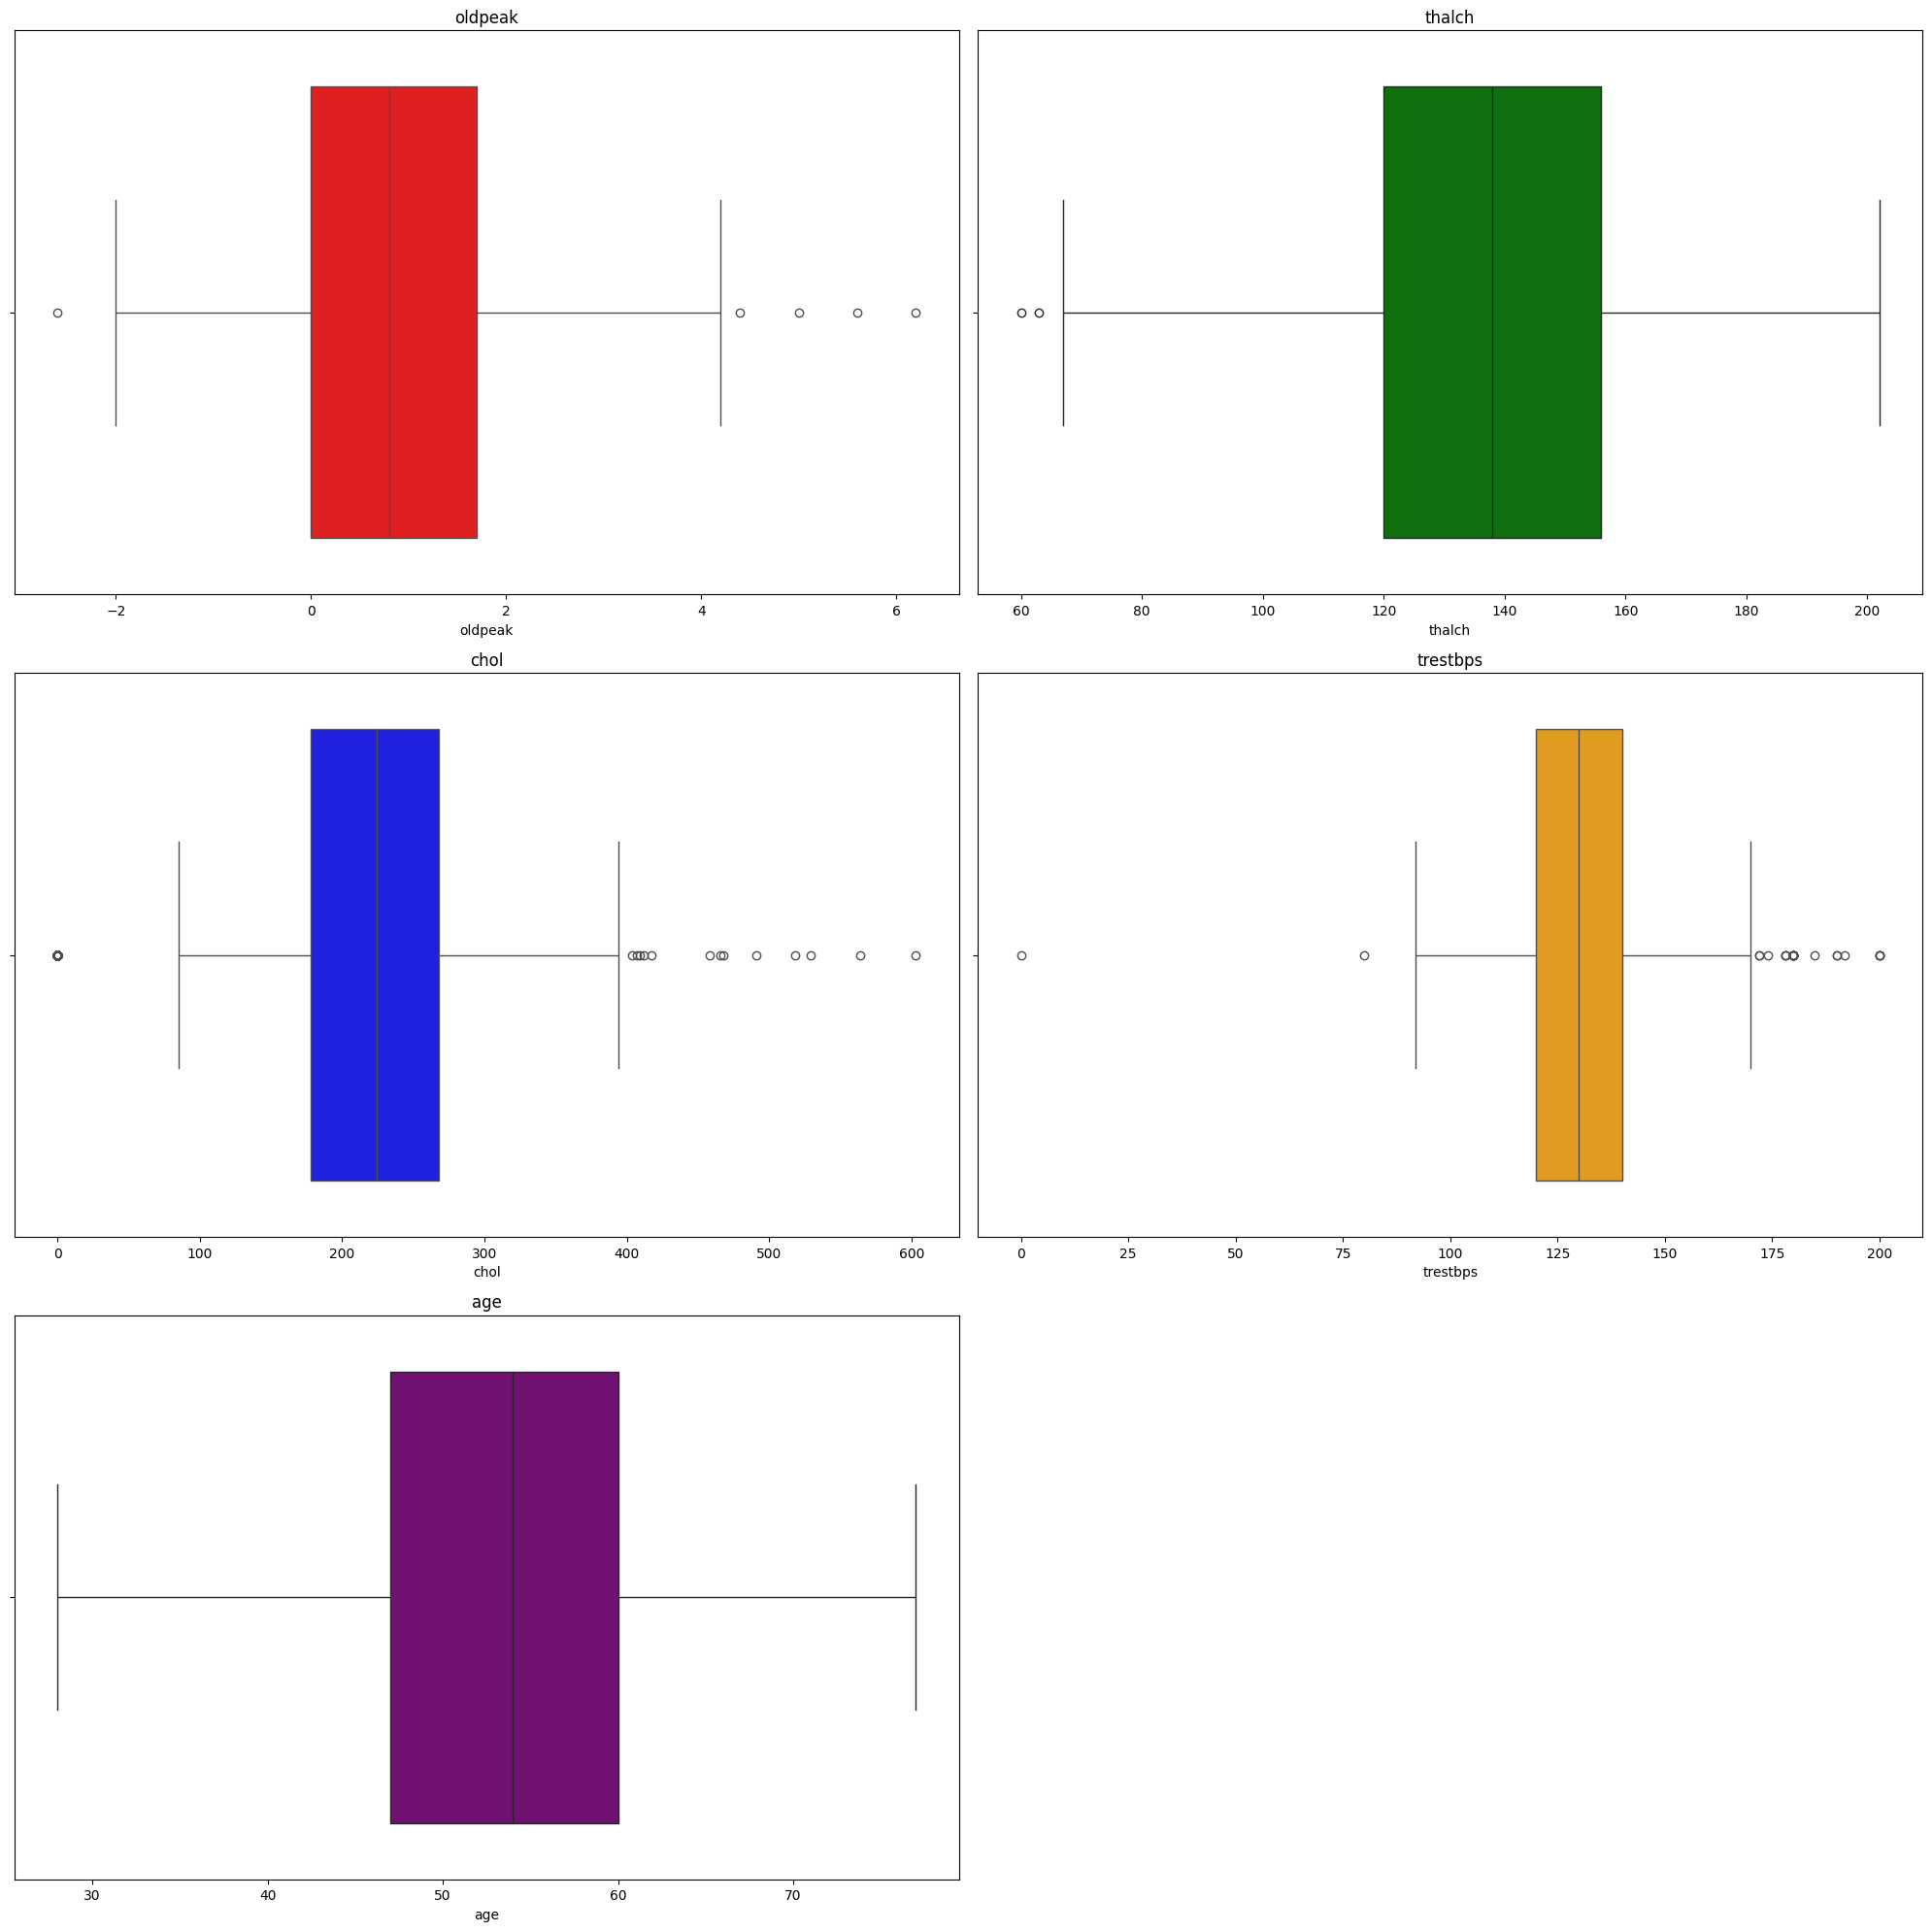

In [ ]:
#Dealing with Outliers
# create boxplot for all numeric columns using for loop and subplots
plt.figure(figsize=(20,20))

colors= ['red','green','blue','orange','purple']
for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col],color=colors[i])
    plt.title(col)
    plt.tight_layout()
plt.show()

In [ ]:
# make plot with plotly to get clear insights of the numerical columns
fig = px.box(df,y=numeric_cols,color_discrete_sequence=colors)
fig.update_layout(title='Boxplot of Numerical Columns',height=1000,width=1000)
fig.show()

In [ ]:
# find the record where trestbps is zero
df[df['trestbps'] == 0]

# remove this record from the data
df = df[df['trestbps'] != 0]

In [ ]:
#Encoding
# Encode the categorical columns of X by label encoder and save it for Inverse transform
# Automatically select object/categorical columns
cat_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

# Create dictionary to store encoders per column
encoders = {}

# Encode each column using separate LabelEncoder and save encoder for inverse_transform
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))  # Handle missing as 'nan'
    encoders[col] = le

# Now df is encoded
print(df.head())


# Inverse transform example (recover original values)
# for col in cat_cols:
#     df[col] = encoders[col].inverse_transform(df[col])

# Now df has original values back
# print(df.head())

   id  age  sex  dataset  cp  trestbps   chol  fbs  restecg  thalch  exang  \
0   1   63    1        0   3     145.0  233.0    1        0   150.0      0   
1   2   67    1        0   0     160.0  286.0    0        0   108.0      1   
2   3   67    1        0   0     120.0  229.0    0        0   129.0      1   
3   4   37    1        0   2     130.0  250.0    0        1   187.0      0   
4   5   41    0        0   1     130.0  204.0    0        0   172.0      0   

   oldpeak  slope   ca  thal  num  trestbps_category  
0      2.3      0  0.0     0    0                  2  
1      1.5      1  3.0     1    2                  6  
2      2.6      1  2.0     2    1                  5  
3      3.5      0  0.0     1    0                  1  
4      1.4      2  0.0     1    0                  1  


In [ ]:
#Machine Learning
df['num'].value_counts()

,count
num,
0,411
1,265
2,109
3,106
4,28


In [ ]:
# Create feature and label
X = df.drop('num', axis=1)
y = df['num']
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#Import Models of Machine Learning
# import all the models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,HistGradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# import pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score

# import model selection
from sklearn.model_selection import GridSearchCV,train_test_split,cross_val_score


In [ ]:
#Defining the Models
#  Define models and hyperparameter grids

models = {
    "LogisticRegression": {
        "model": LogisticRegression(),
        "params": {}  # No hyperparams for basic linear model
    },
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "model__n_estimators": [50, 100],
            "model__max_depth": [10, 20],
        }
    },
    "XGBoost": {
        "model": XGBClassifier(random_state=42),
        "params": {
            "model__n_estimators": [50, 100],
            "model__max_depth": [3, 6],
            "model__learning_rate": [0.1, 0.3]
        }
    },
    "SVC": {
        "model": SVC(),
        "params": {
            "model__kernel": ['linear', 'rbf'],
            "model__C": [0.1, 1, 10],
            "model__gamma": ['scale', 'auto']
        }
    },
    "KNeighbors": {
        "model": KNeighborsClassifier(),
        "params": {
            "model__n_neighbors": [3, 5, 7],
            "model__weights": ['uniform', 'distance']
        }
    },
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "model__n_estimators": [100, 200],
            "model__learning_rate": [0.05, 0.1],
            "model__max_depth": [3, 5]
        }
    },
    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=42),
        "params": {
            "model__n_estimators": [50, 100],
            "model__learning_rate": [0.5, 1.0]
        }
    },
    "HistGradientBoosting": {
        "model": HistGradientBoostingClassifier(random_state=42),
        "params": {
            "model__learning_rate": [0.05, 0.1],
            "model__max_iter": [100, 200],
            "model__max_depth": [None, 10]
        }
    }
}

In [ ]:
#Applying Grid Search CV
# Store results (model name and performance metrics)
results = []
best_accuracy = 0
best_model = None

# Iterate over the models
for name, model_params in models.items():

    # Create pipeline with the current model
    pipeline = Pipeline([

        ('model', model_params['model'])
    ])

    # Hyperparameter tuning
    grid_search = GridSearchCV(pipeline, model_params['params'], cv=5, scoring='accuracy',error_score='raise', n_jobs=-2)

    # Fit on training data
    grid_search.fit(X_train, y_train)

    # Get best model
    best_model = grid_search.best_estimator_

    # Predict on test set
    y_pred = best_model.predict(X_test)

    # Store results for current model
    results.append({
        "Model": name,
        "Best Params": grid_search.best_params_,
        "Cross-Validated Accuracy": grid_search.best_score_,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred,average='micro'),
        "Recall": recall_score(y_test, y_pred,average='micro'),
        "F1": f1_score(y_test, y_pred,average='micro')
    })

# Track best model
    if grid_search.best_score_ > best_accuracy:
        best_accuracy = grid_search.best_score_
        best_model = grid_search.best_estimator_

# Display best model
print(f"Best Model : {best_model}")
print(f"Best Cross-Validated Accuracy: {best_accuracy:.4f}")

Best Model : Pipeline(steps=[('model',
                 HistGradientBoostingClassifier(learning_rate=0.05,
                                                max_depth=10,
                                                random_state=42))])
Best Cross-Validated Accuracy: 0.6776


In [ ]:
#Evaluation of Models
# Final results
results_df = pd.DataFrame(results)
results_df

,Model,Best Params,Cross-Validated Accuracy,Accuracy,Precision,Recall,F1
0,LogisticRegression,{},0.632653,0.581522,0.581522,0.581522,0.581522
1,RandomForest,"{'model__max_depth': 10, 'model__n_estimators'...",0.677551,0.663043,0.663043,0.663043,0.663043
2,XGBoost,"{'model__learning_rate': 0.1, 'model__max_dept...",0.669388,0.652174,0.652174,0.652174,0.652174
3,SVC,"{'model__C': 10, 'model__gamma': 'scale', 'mod...",0.624490,0.576087,0.576087,0.576087,0.576087
4,KNeighbors,"{'model__n_neighbors': 5, 'model__weights': 'd...",0.594558,0.565217,0.565217,0.565217,0.565217
5,GradientBoosting,"{'model__learning_rate': 0.05, 'model__max_dep...",0.666667,0.657609,0.657609,0.657609,0.657609
6,AdaBoost,"{'model__learning_rate': 0.5, 'model__n_estima...",0.646259,0.592391,0.592391,0.592391,0.592391
7,HistGradientBoosting,"{'model__learning_rate': 0.05, 'model__max_dep...",0.658503,0.646739,0.646739,0.646739,0.646739


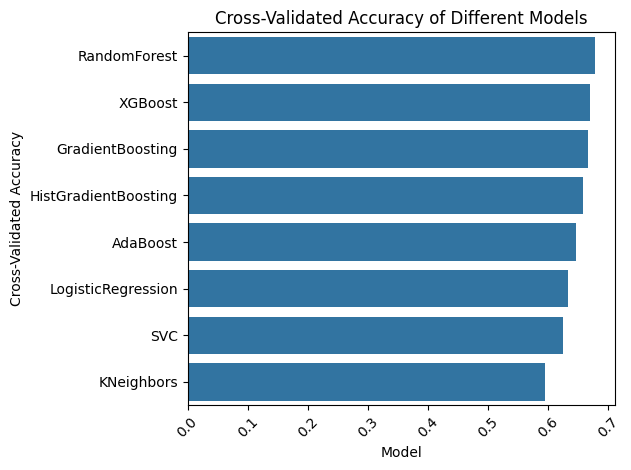

In [ ]:
# Sort the DataFrame by the 'Cross-Validated Accuracy' column in descending order
sorted_df = results_df.sort_values(by='Cross-Validated Accuracy', ascending=False)

# Create a bar plot
sns.barplot(x=sorted_df['Cross-Validated Accuracy'], y=sorted_df['Model'],orient='h')
plt.xlabel('Model')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Cross-Validated Accuracy of Different Models')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

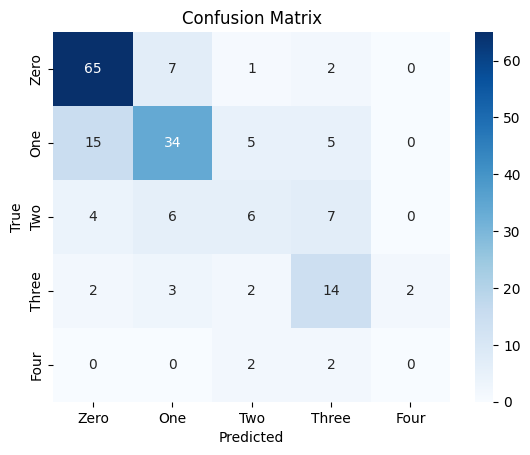

In [ ]:
# Define class names for the confusion matrix
class_names = ['Zero', 'One', 'Two', 'Three','Four']

# Define the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Retaining the Best Model
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_iter': [10, 50, 100],
    'max_depth': [10, 30, 50]
}

# Initialize the model
model = HistGradientBoostingClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # You can use other metrics
    n_jobs=-1  # Use all available cores
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best hyperparameters
print("Best parameters:", grid_search.best_params_)

# Retrain the best model on the full training set
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Make predictions
y_pred = best_model.predict(X_test)

# Evaluate the model
print(f"accuracy : {accuracy_score(y_test, y_pred)}")
print(f"precision : {precision_score(y_test, y_pred, average='micro')}")
print(f"recall : {recall_score(y_test, y_pred, average='micro')}")
print(f"f1 score : {f1_score(y_test, y_pred, average='micro')}")

Best parameters: {'learning_rate': 0.01, 'max_depth': 10, 'max_iter': 100}
accuracy : 0.6413043478260869
precision : 0.6413043478260869
recall : 0.6413043478260869
f1 score : 0.6413043478260869


In [ ]:
#Saving the Best Model
# save the best model
import pickle
pickle.dump(best_model, open('histgradientboosting.pkl', 'wb'))

In [ ]:
#what to do with the Best Model and How to use it?